# Analysis of results 

In [1]:
cd ~/thesis/

/home/jovyan/thesis


/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/jovyan/venvs/my_environment/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Initial processing

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import ast

from analysis_utils import *

/tmp/ipykernel_325/70208650.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
results_df = pd.read_csv('results.csv')

In [4]:
results_df.head(10)

,dataset,nodes,edges,retraining_type,metric,10%,20%,30%,40%,50%,60%,70%,80%,90%,parameters,training_time,dynamic_update,num_different_nodes,num_starting_nodes,execution_timestamp
0,blog_catalog,10312,333983,global,macro,0.200753,0.199724,0.214322,0.201168,0.206342,0.200239,0.198569,0.192867,0.195230,"(128, 40, 80, 0.25, 1)",5098.421046,extend,512,512,14/06/2024 - 19:57
1,blog_catalog,10312,333983,global,micro,0.204457,0.201648,0.214932,0.201939,0.207331,0.200388,0.199335,0.193939,0.195453,"(128, 40, 80, 0.25, 1)",5098.421046,extend,512,512,14/06/2024 - 19:57
2,blog_catalog,10312,333983,local,macro,0.183361,0.202239,0.196802,0.206104,0.213029,0.212130,0.213315,0.205747,0.208313,"(128, 40, 80, 0.25, 1)",1466.205247,extend,512,512,14/06/2024 - 19:57
3,blog_catalog,10312,333983,local,micro,0.185078,0.203102,0.197802,0.207030,0.214119,0.213316,0.214711,0.208000,0.209676,"(128, 40, 80, 0.25, 1)",1466.205247,extend,512,512,14/06/2024 - 19:57
4,blog_catalog,10312,333983,global,macro,0.209010,0.205892,0.206661,0.204214,0.202344,0.195139,0.198391,0.207131,0.201637,"(128, 40, 80, 0.25, 1)",4254.954576,prune,512,5876,14/06/2024 - 16:52
5,blog_catalog,10312,333983,global,micro,0.209184,0.206122,0.208092,0.205357,0.203469,0.195748,0.199971,0.207781,0.202381,"(128, 40, 80, 0.25, 1)",4254.954576,prune,512,5876,14/06/2024 - 16:52
6,blog_catalog,10312,333983,local,macro,0.178364,0.192953,0.188758,0.200132,0.201297,0.201317,0.193922,0.206374,0.203722,"(128, 40, 80, 0.25, 1)",1494.013343,prune,512,5876,14/06/2024 - 16:52
7,blog_catalog,10312,333983,local,micro,0.181202,0.194377,0.190368,0.202909,0.202676,0.202650,0.194902,0.206788,0.204612,"(128, 40, 80, 0.25, 1)",1494.013343,prune,512,5876,14/06/2024 - 16:52
8,blog_catalog,10312,333983,global,macro,0.186685,0.191709,0.193777,0.199486,0.204721,0.201654,0.196953,0.191641,0.197756,"(128, 40, 80, 0.25, 1)",4969.717611,extend,512,512,14/06/2024 - 13:55
9,blog_catalog,10312,333983,global,micro,0.189922,0.194862,0.196186,0.200970,0.206168,0.203782,0.198642,0.194303,0.199978,"(128, 40, 80, 0.25, 1)",4969.717611,extend,512,512,14/06/2024 - 13:55


In [5]:
results_df.size

65040

In [6]:
# These are the parameters for calculating the gloal/local difference
config = {'dataset': 'cora',
          'dynamic_update': 'extend',
          'metric': 'macro',
          'parameters': '(128, 80, 160, 4, 4)',
          'num_different_nodes': 512}

In [7]:
sub_df = accu_time_df_gen(results_df, config)

In [8]:
# Calculate the average accuracy difference
avg_accuracy_diff_perc = 100* (abs(sub_df.loc[0, 'average_accuracy'] - sub_df.loc[1, 'average_accuracy']) / sub_df.loc[0, 'average_accuracy'])

# Calculate the training time difference
training_time_diff_perc = 100* (abs(sub_df.loc[0, 'training_time'] - sub_df.loc[1, 'training_time'])) / sub_df.loc[0, 'training_time']

In [9]:
avg_accuracy_diff_perc, training_time_diff_perc

(1.0062304228615382, 69.9747829843204)

In [10]:
sub_df

,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
0,cora,global,"(128, 80, 160, 4, 4)",extend,0.790612,415.683768
1,cora,local,"(128, 80, 160, 4, 4)",extend,0.782657,124.809953


### Hyperparameter tuning

In [8]:
# Should have been 300 (?)
all_parameters = list(results_df['parameters'].unique())
len(all_parameters)

371

#### Cora

In [9]:
config = {'dataset': 'cora',
          'dynamic_update': 'extend',
          'metric': 'macro',
          'num_different_nodes': 512}

In [10]:
all_df = mult_params_accu_time_df_gen(results_df, config, all_parameters)

In [11]:
all_df

cora,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
0,cora,global,"(128, 40, 80, 0.25, 1)",extend,0.794214,102.186127
1,cora,local,"(128, 40, 80, 0.25, 1)",extend,0.791296,30.813241
2,cora,global,"(128, 40, 80, 0.25, 4)",extend,0.764001,98.438024
3,cora,local,"(128, 40, 80, 0.25, 4)",extend,0.762352,29.946715
4,cora,global,"(128, 40, 80, 0.25, 2)",extend,0.783103,100.733689
...,...,...,...,...,...,...
199,cora,local,"(128, 40, 80, 0.5, 0.25)",extend,0.802119,33.299119
200,cora,global,"[64, 8, 8, 0.25, 4]",extend,0.719772,3.050927
201,cora,local,"[64, 8, 8, 0.25, 4]",extend,0.663561,2.501036
202,cora,global,"[64, 8, 8, 0.25, 4]",extend,0.731451,2.913603


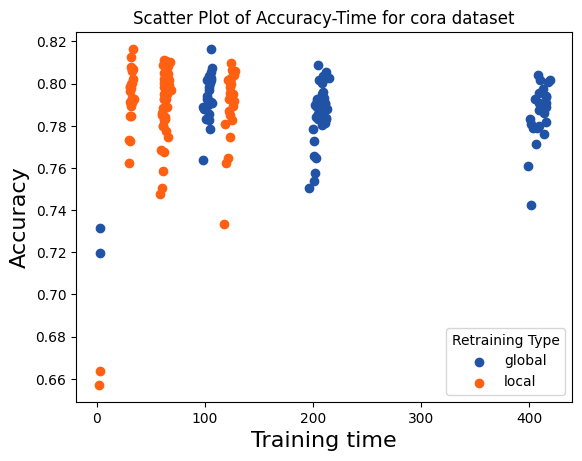

In [12]:
accu_time_plot(all_df)

In [13]:
# sub_df = sub_df[sub_df.loc[:, 'retraining_type'] == 'global'].reset_index(drop=True)
all_df.sort_values(by='average_accuracy', ascending=False).head(15)

cora,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
41,cora,local,"(128, 40, 80, 2, 1)",extend,0.816479,33.817051
32,cora,global,"(128, 40, 80, 4, 2)",extend,0.816394,105.576616
51,cora,local,"(128, 40, 80, 0.25, 0.25)",extend,0.812863,31.953484
153,cora,local,"(128, 40, 160, 1, 1)",extend,0.811209,62.478489
145,cora,local,"(128, 40, 160, 2, 0.5)",extend,0.810902,63.524729
113,cora,local,"(128, 80, 80, 1, 0.25)",extend,0.810208,64.816080
105,cora,local,"(128, 80, 80, 4, 0.25)",extend,0.810062,67.367942
87,cora,local,"(128, 80, 160, 0.5, 1)",extend,0.809882,123.806995
126,cora,global,"(128, 80, 80, 0.25, 0.25)",extend,0.809080,204.833654
163,cora,local,"(128, 40, 160, 0.5, 1)",extend,0.808739,61.532741


In [14]:
all_df.loc[all_df['retraining_type'] == 'global']

cora,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
0,cora,global,"(128, 40, 80, 0.25, 1)",extend,0.794214,102.186127
2,cora,global,"(128, 40, 80, 0.25, 4)",extend,0.764001,98.438024
4,cora,global,"(128, 40, 80, 0.25, 2)",extend,0.783103,100.733689
6,cora,global,"(128, 80, 80, 4, 4)",extend,0.802823,214.764291
8,cora,global,"(128, 80, 80, 4, 2)",extend,0.802578,211.522388
...,...,...,...,...,...,...
194,cora,global,"(128, 40, 80, 0.5, 1)",extend,0.782708,104.047462
196,cora,global,"(128, 40, 80, 0.5, 0.5)",extend,0.803651,103.660669
198,cora,global,"(128, 40, 80, 0.5, 0.25)",extend,0.785540,104.126992
200,cora,global,"[64, 8, 8, 0.25, 4]",extend,0.719772,3.050927


In [15]:
temp_df = all_df.loc[all_df['retraining_type'] == 'global']
dict(temp_df.iloc[temp_df['average_accuracy'].argmax()])

{'dataset': 'cora',
 'retraining_type': 'global',
 'parameters': '(128, 40, 80, 4, 2)',
 'dynamic_update': 'extend',
 'average_accuracy': 0.8163936506487652,
 'training_time': 105.576616048813}

#### Wikipedia 

In [16]:
config = {'dataset': 'wikipedia',
          'dynamic_update': 'extend',
          'metric': 'macro',
          'num_different_nodes': 512}


In [17]:
all_df = mult_params_accu_time_df_gen(results_df, config, all_parameters)

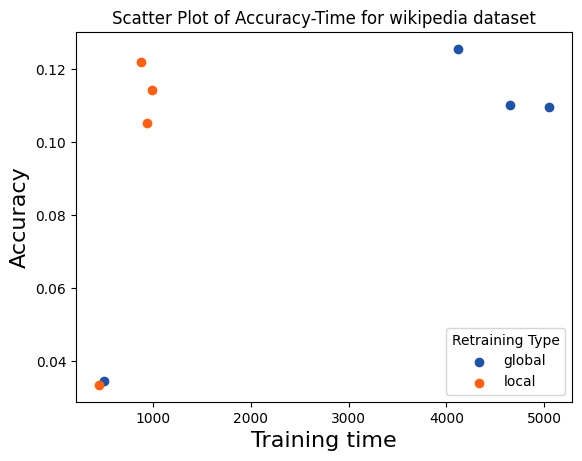

In [18]:
accu_time_plot(all_df)

In [19]:
temp_df = all_df.loc[all_df['retraining_type'] == 'global']
dict(temp_df.iloc[all_df['average_accuracy'].argmax()])

{'dataset': 'wikipedia',
 'retraining_type': 'global',
 'parameters': '(128, 40, 80, 0.25, 1)',
 'dynamic_update': 'extend',
 'average_accuracy': 0.1256420338240266,
 'training_time': 4115.74851751328}

#### PPI

In [20]:
config = {'dataset': 'PPI',
          'dynamic_update': 'extend',
          'metric': 'macro',
          'num_different_nodes': 512}

In [21]:
all_df = mult_params_accu_time_df_gen(results_df, config, all_parameters)

In [22]:
# sub_df = sub_df[sub_df.loc[:, 'retraining_type'] == 'global'].reset_index(drop=True)
all_df.sort_values(by='average_accuracy', ascending=False).head(15)

PPI,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
41,PPI,local,"(128, 40, 80, 2, 1)",extend,0.103872,103.184063
9,PPI,local,"(128, 80, 80, 4, 2)",extend,0.101657,172.781480
11,PPI,local,"(128, 80, 80, 4, 1)",extend,0.101450,167.833059
19,PPI,local,"(128, 80, 80, 1, 4)",extend,0.098656,174.081321
50,PPI,global,"(128, 40, 80, 0.25, 0.25)",extend,0.098650,388.765121
32,PPI,global,"(128, 40, 80, 4, 2)",extend,0.098615,425.821706
23,PPI,local,"(128, 80, 80, 1, 1)",extend,0.098259,168.280955
31,PPI,local,"(128, 40, 80, 4, 4)",extend,0.098193,101.546633
46,PPI,global,"(128, 40, 80, 1, 1)",extend,0.098017,421.142078
33,PPI,local,"(128, 40, 80, 4, 2)",extend,0.097698,102.307316


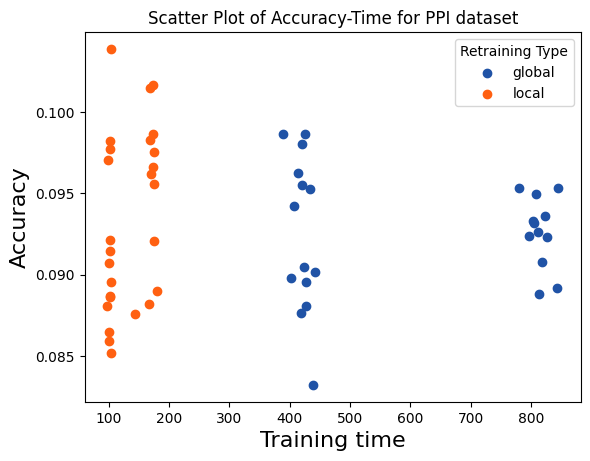

In [23]:
accu_time_plot(all_df)

In [24]:
temp_df = all_df.loc[all_df['retraining_type'] == 'global']
dict(temp_df.iloc[temp_df['average_accuracy'].argmax()])

{'dataset': 'PPI',
 'retraining_type': 'global',
 'parameters': '(128, 40, 80, 0.25, 0.25)',
 'dynamic_update': 'extend',
 'average_accuracy': 0.09864955767362732,
 'training_time': 388.765121221542}

#### BlogCatalog

In [25]:

#     config = {'dataset': 'blog_catalog',
#             'dynamic_update': 'extend',
#             'metric': 'macro',
#             'num_different_nodes': 1024}

## Table of results for specific dataset

In [26]:
perc_list = ['10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%']

In [28]:
# These are the parameters for calculating the gloal/local difference
config = {'dataset': 'cora',
          'dynamic_update': 'extend',
          'parameters': '(128, 40, 80, 4, 2)',
          'num_different_nodes': 512}

In [29]:
table_df = table_df_gen(results_df, config)

In [30]:
dict(sub_df.iloc[sub_df['average_accuracy'].argmax()])

{'dataset': 'cora',
 'retraining_type': 'global',
 'parameters': '(128, 80, 160, 4, 4)',
 'dynamic_update': 'extend',
 'average_accuracy': 0.7906122755311732,
 'training_time': 415.683768033981}

In [31]:
np.arange(0.1, 1, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [32]:
# Filter the DataFrame for 'macro' and 'micro' scores
macro_df = table_df[table_df['metric'] == 'macro']
micro_df = table_df[table_df['metric'] == 'micro']

# X-axis values
x_values = 1 - np.arange(0.1, 1, 0.1)

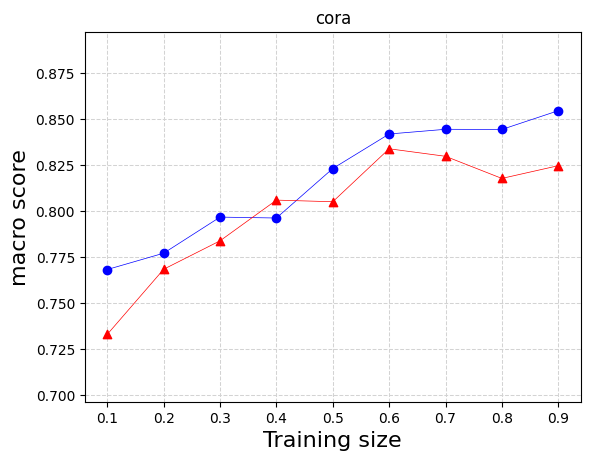

In [34]:
# Plot for macro scores
table_scores_plot(macro_df, 'macro')

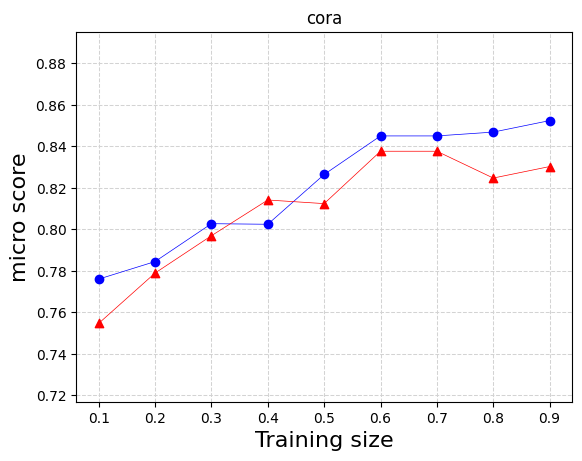

In [35]:
# Plot for macro scores
table_scores_plot(micro_df, 'micro')

In [36]:
# These are the parameters for calculating the gloal/local difference
config = {'parameters': '(128, 40, 80, 0.25, 1)',
         'num_different_nodes': 512,
         'dynamic_update': 'extend'}

dfs = []
dataset_names = ['cora', 'wikipedia', 'PPI', 'blog_catalog']

for dataset in dataset_names:

    config['dataset'] = dataset

    table_df = table_df_gen(results_df, config)

    dfs.append(table_df)

dfs[-1] = dfs[-1].loc[:3]  

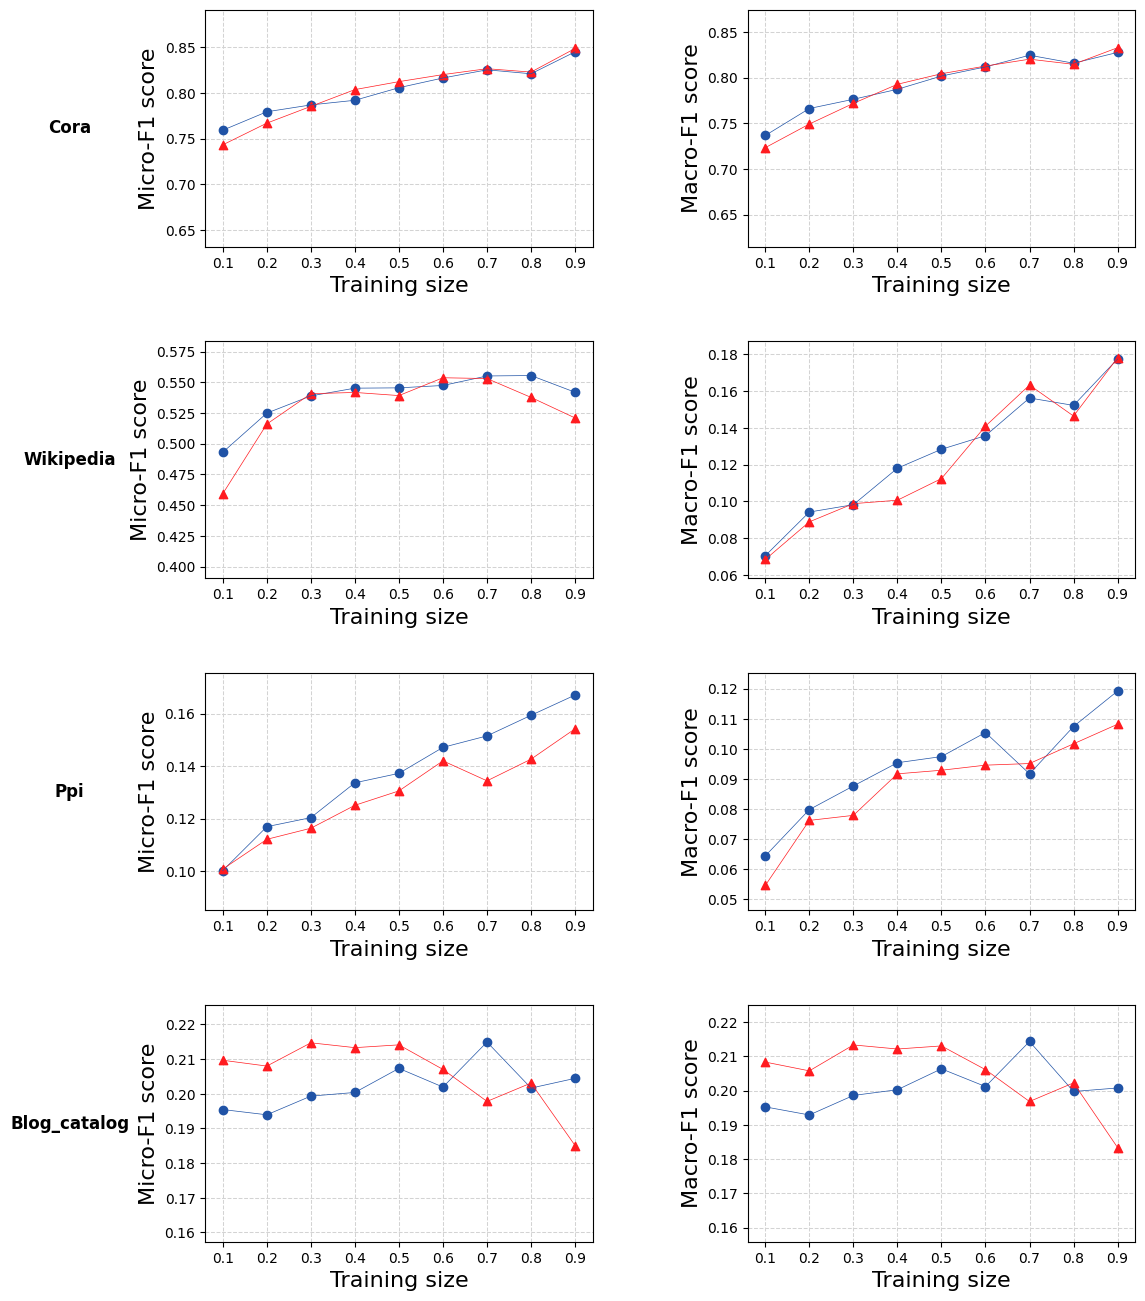

In [37]:
exp_table_scores_plot(dfs, dataset_names)

## Graphs 

In [38]:
speed_df = sub_df.copy()

In [39]:
speed_df.sort_values(by='average_accuracy', ascending=False).head(30)['parameters']

0    (128, 80, 160, 4, 4)
1    (128, 80, 160, 4, 4)
Name: parameters, dtype: object

In [40]:
# Function to convert string to tuple and extract required elements
def extract_elements(param_str):
    tuple_obj = ast.literal_eval(param_str)
    return tuple_obj[1], tuple_obj[2]

# Apply the function to the 'parameters' column and create new columns
speed_df[['walk_length', 'walks_num']] = speed_df['parameters'].apply(lambda x: pd.Series(extract_elements(x)))

In [41]:
speed_df.tail(8)

,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time,walk_length,walks_num
0,cora,global,"(128, 80, 160, 4, 4)",extend,0.790612,415.683768,80,160
1,cora,local,"(128, 80, 160, 4, 4)",extend,0.782657,124.809953,80,160


In [42]:
speed_df = speed_df.loc[speed_df['walk_length'] != 8]

In [43]:
speed_df['walk_length'].unique()

array([80])

In [44]:
global_speed_df = speed_df.loc[speed_df['retraining_type'] == 'global']
local_speed_df = speed_df.loc[speed_df['retraining_type'] == 'local']

In [45]:
global_speed_df

,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time,walk_length,walks_num
0,cora,global,"(128, 80, 160, 4, 4)",extend,0.790612,415.683768,80,160


In [46]:
global_speed_df.loc[global_speed_df['walk_length'] == 80, 'training_time'].mean()

415.683768033981

In [47]:
local_speed_df.loc[local_speed_df['walk_length'] == 80, 'training_time'].mean()


124.809953451157

In [48]:
global_speed_df.loc[global_speed_df['walk_length'] == 40, 'training_time'].mean()

nan

In [49]:
local_speed_df.loc[local_speed_df['walk_length'] == 40, 'training_time'].mean()

nan

## One parameter set evaluation 

In [50]:
param_df = results_df.loc[results_df['parameters'] == '(128, 40, 80, 0.25, 1)']

In [82]:
# These are the parameters for calculating the gloal/local difference
config = {'parameters': '(128, 40, 80, 0.25, 1)',
          'metric': 'macro',
          'num_different_nodes': 512}

alL_stats_dict = {'extend': {}, 'prune': {}}

for dynamic_update in alL_stats_dict:

    for dataset in param_df['dataset'].unique():
        
        config['dataset'] = dataset
        sub_df = accu_time_df_gen(param_df, config)

        # if dynamic_update in list(sub_df['dynamic_update']):
        dynamic_df = sub_df[sub_df['dynamic_update'] == dynamic_update]
        dynamic_df = dynamic_df.reset_index(drop=True)

        #  # Calculate the average accuracy difference
        # avg_accuracy_diff_perc = 100 * (abs(dynamic_df.loc[0, 'average_accuracy'] - dynamic_df.loc[1, 'average_accuracy']) / dynamic_df.loc[0, 'average_accuracy'])

        # # Calculate the training time difference
        # training_time_diff_perc = 100 * (abs(dynamic_df.loc[0, 'training_time'] - dynamic_df.loc[1, 'training_time'])) / dynamic_df.loc[0, 'training_time']

        # Calculate the average accuracy difference
        avg_accuracy_diff_perc = (abs(dynamic_df.loc[0, 'average_accuracy'] - dynamic_df.loc[1, 'average_accuracy']) / dynamic_df.loc[0, 'average_accuracy'])

        # Calculate the training time difference
        training_time_diff_perc = (abs(dynamic_df.loc[0, 'training_time'] - dynamic_df.loc[1, 'training_time'])) / dynamic_df.loc[0, 'training_time']

        alL_stats_dict[dynamic_update].update({dataset: (avg_accuracy_diff_perc, training_time_diff_perc)})


In [83]:
alL_stats_dict

{'extend': {'blog_catalog': (0.017591764122511892, 0.7124197406370603),
  'wikipedia': (0.029285962240930375, 0.786130452798154),
  'PPI': (0.06563866343758801, 0.759588752940188),
  'cora': (0.0036741912773315976, 0.6984596418737402)},
 'prune': {'blog_catalog': (0.034735885626950506, 0.6488767819791232),
  'wikipedia': (0.1672134276511298, 0.7541873442683947),
  'PPI': (0.1066271459251596, 0.7964285125068936),
  'cora': (0.07093595182937153, 0.9196668580929749)}}

In [84]:
'prune' in list(sub_df['dynamic_update'])

True

In [85]:
sub_df = accu_time_df_gen(param_df, config)
sub_df

,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
0,cora,global,"(128, 40, 80, 0.25, 1)",prune,0.750689,81.678901
1,cora,local,"(128, 40, 80, 0.25, 1)",prune,0.697438,6.561523
2,cora,global,"(128, 40, 80, 0.25, 1)",extend,0.794214,102.186127
3,cora,local,"(128, 40, 80, 0.25, 1)",extend,0.791296,30.813241


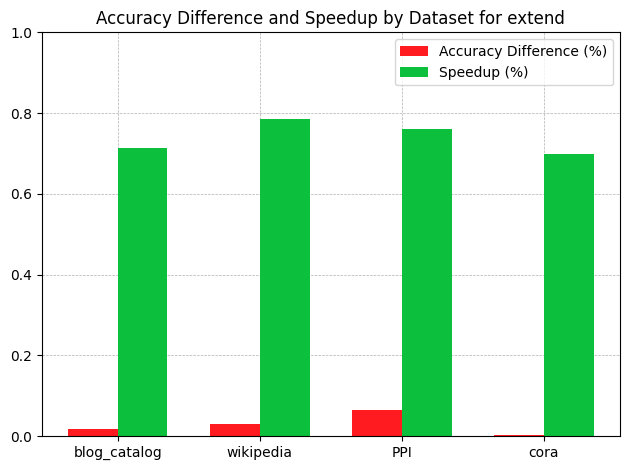

In [86]:
dynamic_update = 'extend'
stats_dict = alL_stats_dict[dynamic_update]

accu_speedup_dataset_plot(alL_stats_dict, dynamic_update)

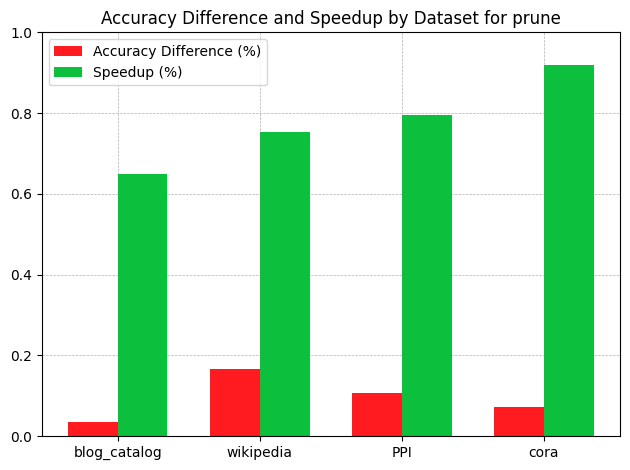

In [87]:
dynamic_update = 'prune'
stats_dict = alL_stats_dict[dynamic_update]

accu_speedup_dataset_plot(alL_stats_dict, dynamic_update)

In [65]:
list(all_df.sort_values(by='average_accuracy', ascending=False).head(15).loc[:, 'parameters'])

['(128, 40, 80, 2, 1)',
 '(128, 80, 80, 4, 2)',
 '(128, 80, 80, 4, 1)',
 '(128, 80, 80, 1, 4)',
 '(128, 40, 80, 0.25, 0.25)',
 '(128, 40, 80, 4, 2)',
 '(128, 80, 80, 1, 1)',
 '(128, 40, 80, 4, 4)',
 '(128, 40, 80, 1, 1)',
 '(128, 40, 80, 4, 2)',
 '(128, 80, 80, 2, 4)',
 '(128, 40, 80, 0.25, 0.25)',
 '(128, 80, 80, 2, 2)',
 '(128, 40, 80, 2, 1)',
 '(128, 80, 80, 0.25, 2)']

## Visualisation things

In [97]:
config = {'dataset': 'cora',
          'dynamic_update': 'extend',
          'metric': 'macro',
          'num_different_nodes': 512}

all_df = mult_params_accu_time_df_gen(results_df, config, all_parameters)

In [98]:
all_df

cora,dataset,retraining_type,parameters,dynamic_update,average_accuracy,training_time
0,cora,global,"(128, 40, 80, 0.25, 1)",extend,0.794214,102.186127
1,cora,local,"(128, 40, 80, 0.25, 1)",extend,0.791296,30.813241
2,cora,global,"(128, 40, 80, 0.25, 4)",extend,0.764001,98.438024
3,cora,local,"(128, 40, 80, 0.25, 4)",extend,0.762352,29.946715
4,cora,global,"(128, 40, 80, 0.25, 2)",extend,0.783103,100.733689
...,...,...,...,...,...,...
199,cora,local,"(128, 40, 80, 0.5, 0.25)",extend,0.802119,33.299119
200,cora,global,"[64, 8, 8, 0.25, 4]",extend,0.719772,3.050927
201,cora,local,"[64, 8, 8, 0.25, 4]",extend,0.663561,2.501036
202,cora,global,"[64, 8, 8, 0.25, 4]",extend,0.731451,2.913603


In [99]:
all_df['parameters'][0]

'(128, 40, 80, 0.25, 1)'

In [100]:
# Function to convert string to tuple and extract required elements
def extract_elements(param_str):
    tuple_obj = ast.literal_eval(param_str)
    return tuple_obj[1], tuple_obj[2]

# Apply the function to the 'parameters' column and create new columns
all_df[['walk_length', 'walks_num']] = all_df['parameters'].apply(lambda x: pd.Series(extract_elements(x)))

all_df = all_df[['dataset', 'retraining_type', 'dynamic_update', 'walk_length', 'walks_num', 'average_accuracy', 'training_time']]

In [102]:
all_df = all_df.loc[all_df['walk_length'] != 8]

In [103]:
all_df

cora,dataset,retraining_type,dynamic_update,walk_length,walks_num,average_accuracy,training_time
0,cora,global,extend,40,80,0.794214,102.186127
1,cora,local,extend,40,80,0.791296,30.813241
2,cora,global,extend,40,80,0.764001,98.438024
3,cora,local,extend,40,80,0.762352,29.946715
4,cora,global,extend,40,80,0.783103,100.733689
...,...,...,...,...,...,...,...
195,cora,local,extend,40,80,0.798554,31.078297
196,cora,global,extend,40,80,0.803651,103.660669
197,cora,local,extend,40,80,0.797760,31.711738
198,cora,global,extend,40,80,0.785540,104.126992


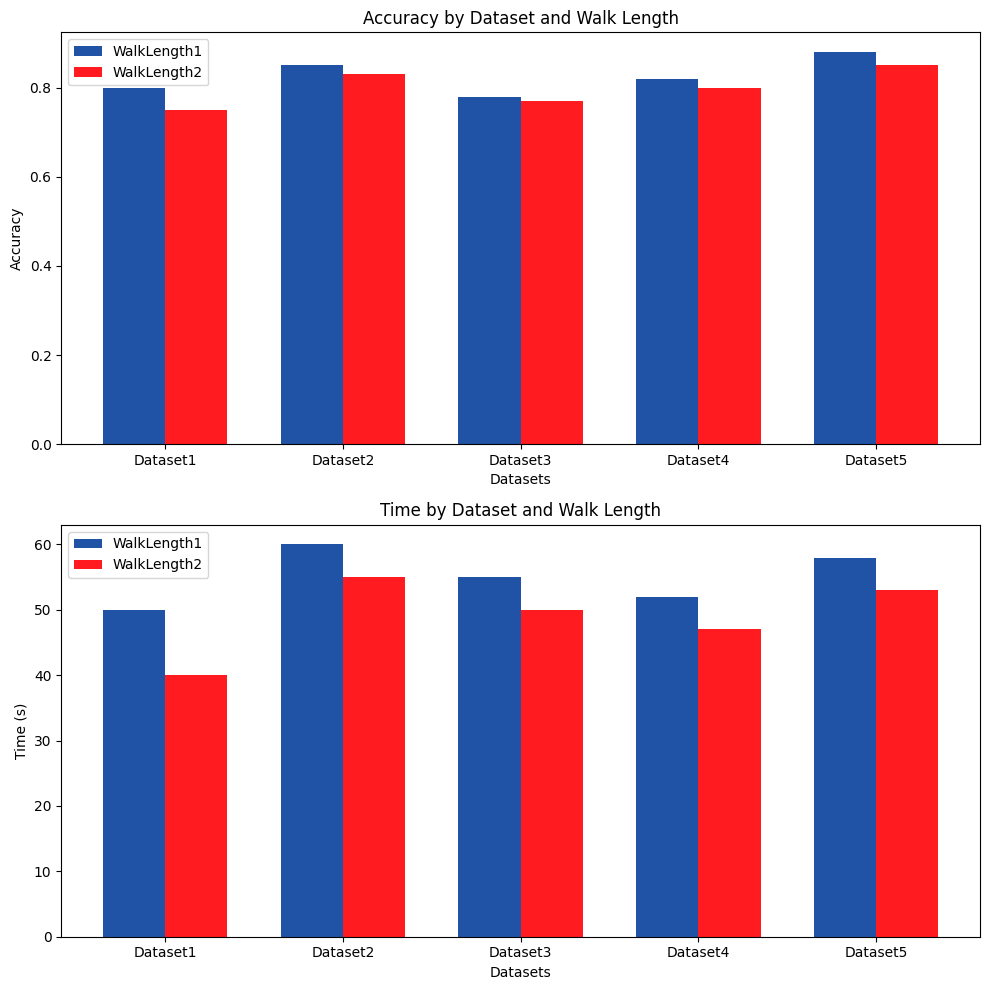

In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
datasets = ['Dataset1', 'Dataset2', 'Dataset3', 'Dataset4', 'Dataset5']
walk_lengths = ['WalkLength1', 'WalkLength2']
accuracy = {
    'WalkLength1': [0.8, 0.85, 0.78, 0.82, 0.88],
    'WalkLength2': [0.75, 0.83, 0.77, 0.80, 0.85]
}
time = {
    'WalkLength1': [50, 60, 55, 52, 58],
    'WalkLength2': [40, 55, 50, 47, 53]
}

# Number of datasets
N = len(datasets)
ind = np.arange(N)
width = 0.35  # width of the bars

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Accuracy Bar Chart
acc1 = ax1.bar(ind - width/2, accuracy['WalkLength1'], width, label='WalkLength1', color='#2053A6')
acc2 = ax1.bar(ind + width/2, accuracy['WalkLength2'], width, label='WalkLength2', color='#FF1B20')

ax1.set_xlabel('Datasets')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy by Dataset and Walk Length')
ax1.set_xticks(ind)
ax1.set_xticklabels(datasets)
ax1.legend()

# Time Bar Chart
time1 = ax2.bar(ind - width/2, time['WalkLength1'], width, label='WalkLength1', color='#2053A6')
time2 = ax2.bar(ind + width/2, time['WalkLength2'], width, label='WalkLength2', color='#FF1B20')

ax2.set_xlabel('Datasets')
ax2.set_ylabel('Time (s)')
ax2.set_title('Time by Dataset and Walk Length')
ax2.set_xticks(ind)
ax2.set_xticklabels(datasets)
ax2.legend()

plt.tight_layout()
plt.show()


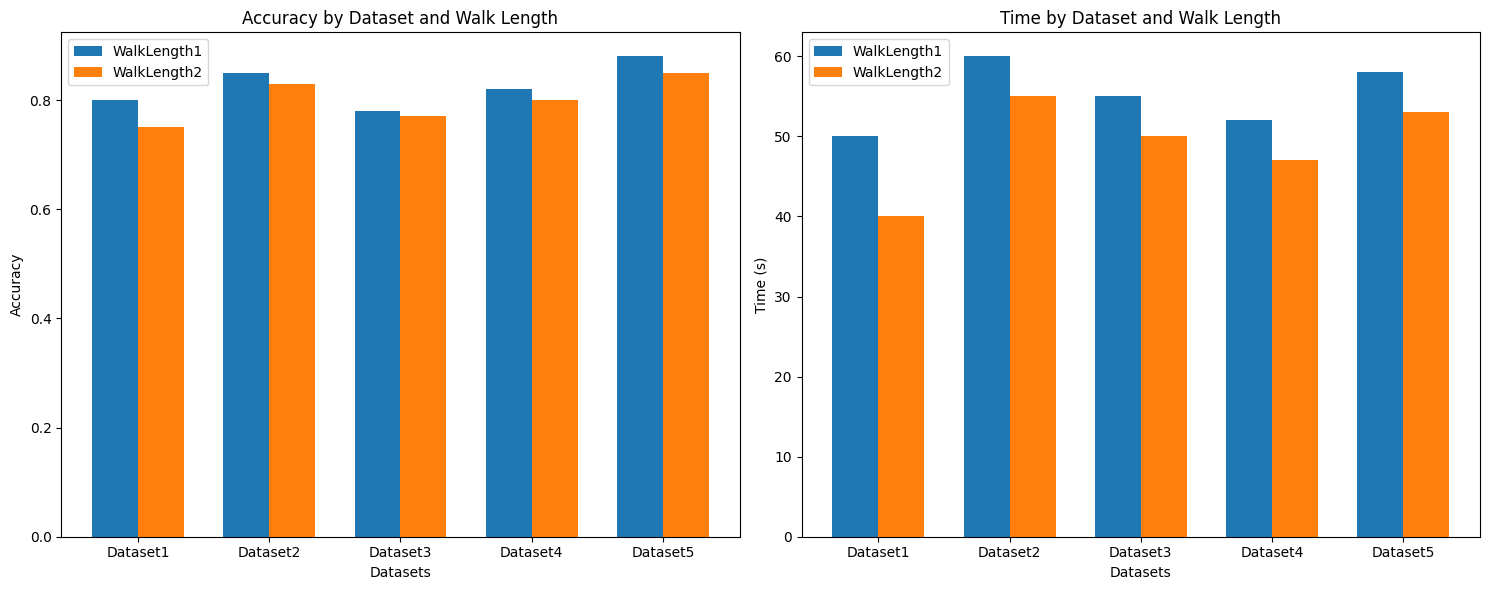

In [70]:
# Sample data as before
...

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Accuracy Side-by-Side Bar Chart
width = 0.35
for i, wl in enumerate(walk_lengths):
    ax1.bar(ind + i * width, accuracy[wl], width, label=wl)

ax1.set_xlabel('Datasets')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy by Dataset and Walk Length')
ax1.set_xticks(ind + width / 2)
ax1.set_xticklabels(datasets)
ax1.legend()

# Time Side-by-Side Bar Chart
for i, wl in enumerate(walk_lengths):
    ax2.bar(ind + i * width, time[wl], width, label=wl)

ax2.set_xlabel('Datasets')
ax2.set_ylabel('Time (s)')
ax2.set_title('Time by Dataset and Walk Length')
ax2.set_xticks(ind + width / 2)
ax2.set_xticklabels(datasets)
ax2.legend()

plt.tight_layout()
plt.show()


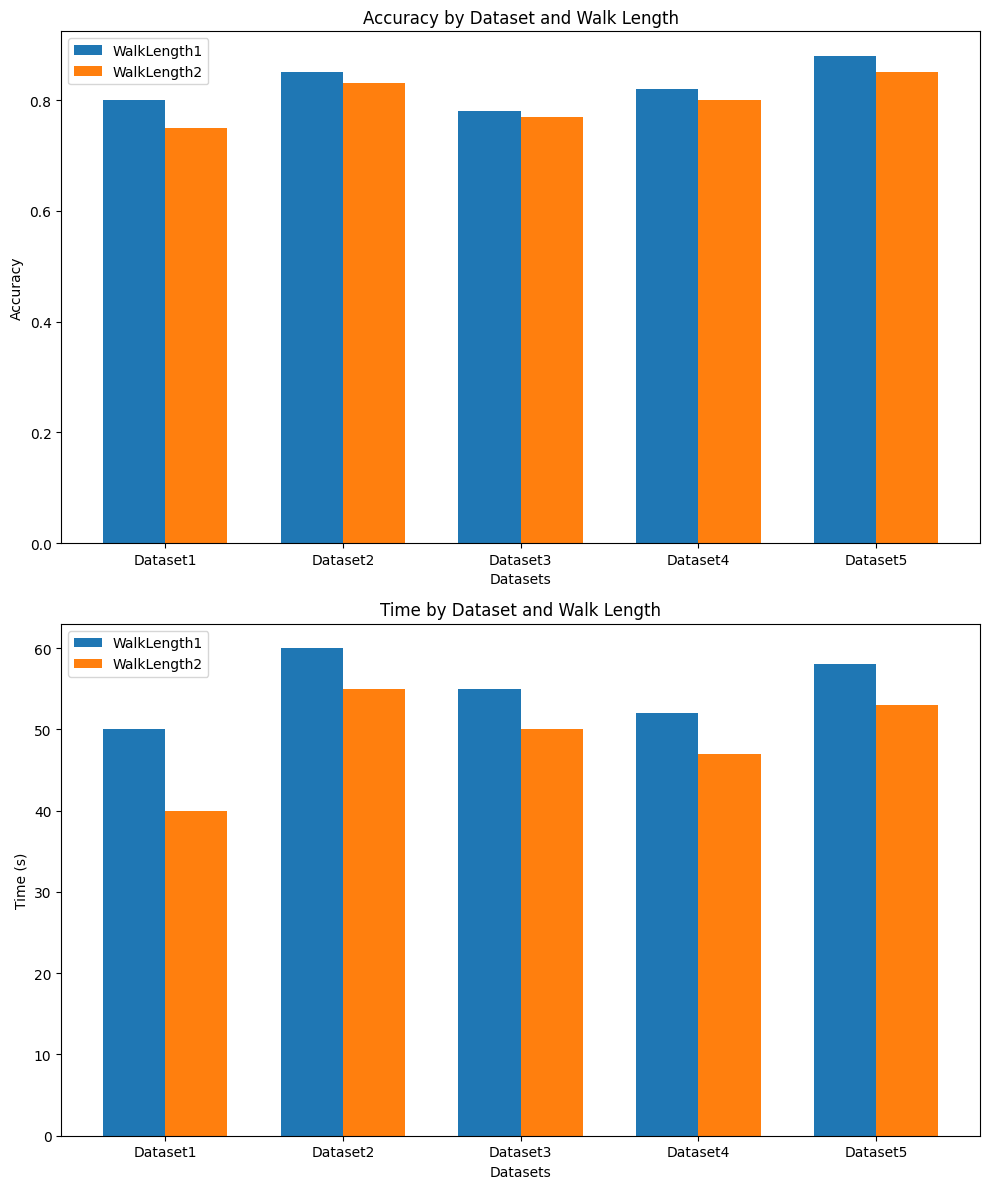

In [71]:
# Sample data as before
...

fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Accuracy Bar Chart
for i, wl in enumerate(walk_lengths):
    axes[0].bar(ind + i * width, accuracy[wl], width, label=wl)

axes[0].set_xlabel('Datasets')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy by Dataset and Walk Length')
axes[0].set_xticks(ind + width / 2)
axes[0].set_xticklabels(datasets)
axes[0].legend()

# Time Bar Chart
for i, wl in enumerate(walk_lengths):
    axes[1].bar(ind + i * width, time[wl], width, label=wl)

axes[1].set_xlabel('Datasets')
axes[1].set_ylabel('Time (s)')
axes[1].set_title('Time by Dataset and Walk Length')
axes[1].set_xticks(ind + width / 2)
axes[1].set_xticklabels(datasets)
axes[1].legend()

plt.tight_layout()
plt.show()


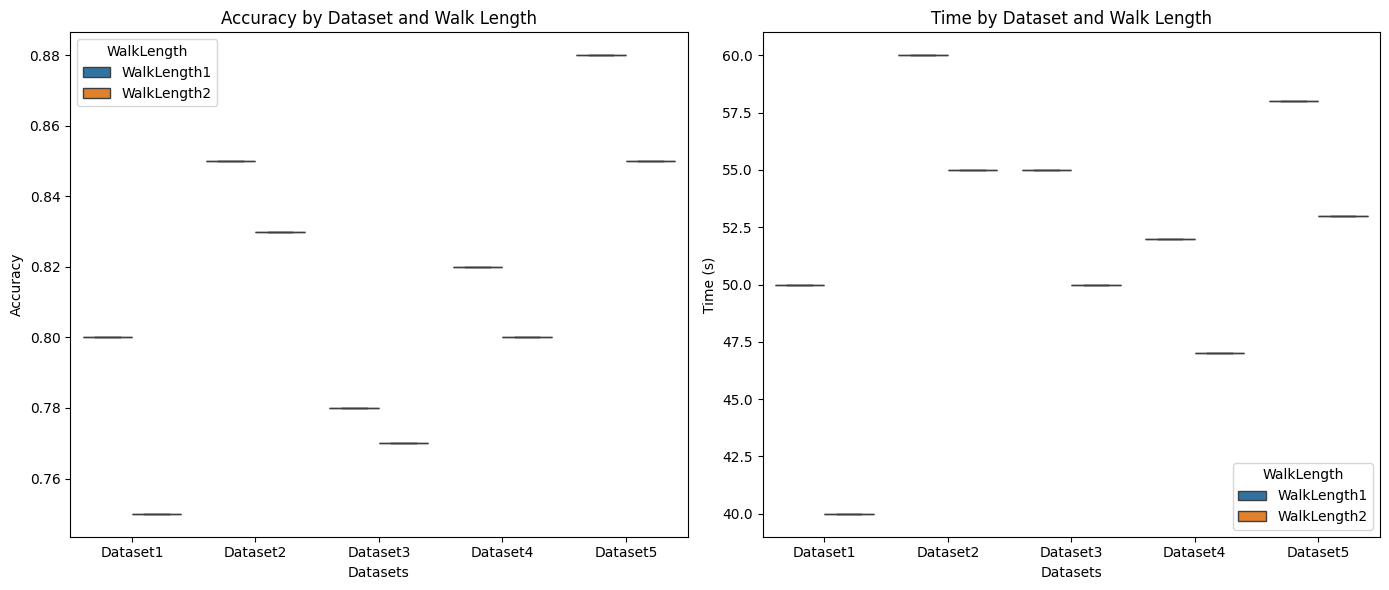

In [72]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Dataset': ['Dataset1', 'Dataset2', 'Dataset3', 'Dataset4', 'Dataset5'] * 2,
    'WalkLength': ['WalkLength1']*5 + ['WalkLength2']*5,
    'Accuracy': [0.8, 0.85, 0.78, 0.82, 0.88, 0.75, 0.83, 0.77, 0.80, 0.85],
    'Time': [50, 60, 55, 52, 58, 40, 55, 50, 47, 53]
}
df = pd.DataFrame(data)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for accuracy
sns.boxplot(x='Dataset', y='Accuracy', hue='WalkLength', data=df, ax=axes[0])
axes[0].set_title('Accuracy by Dataset and Walk Length')
axes[0].set_xlabel('Datasets')
axes[0].set_ylabel('Accuracy')

# Box plot for time
sns.boxplot(x='Dataset', y='Time', hue='WalkLength', data=df, ax=axes[1])
axes[1].set_title('Time by Dataset and Walk Length')
axes[1].set_xlabel('Datasets')
axes[1].set_ylabel('Time (s)')

plt.tight_layout()
plt.show()


In [73]:
accuracy_matrix = df.pivot("WalkLength", "Dataset", "Accuracy")
time_matrix = df.pivot("WalkLength", "Dataset", "Time")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap for accuracy
sns.heatmap(accuracy_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=axes[0])
axes[0].set_title('Accuracy Heatmap')
axes[0].set_xlabel('Datasets')
axes[0].set_ylabel('Walk Length')

# Heatmap for time
sns.heatmap(time_matrix, annot=True, fmt=".1f", cmap="coolwarm", ax=axes[1])
axes[1].set_title('Time Heatmap')
axes[1].set_xlabel('Datasets')
axes[1].set_ylabel('Walk Length')

plt.tight_layout()
plt.show()


TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

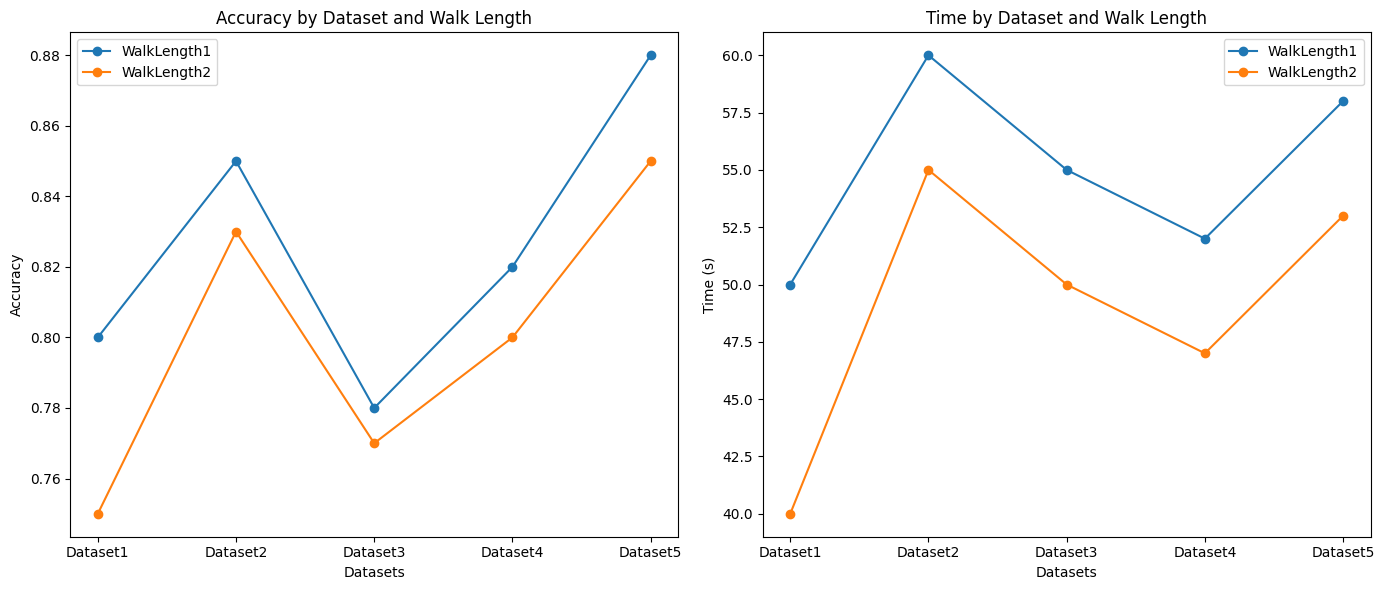

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Line plot for accuracy
for wl in walk_lengths:
    subset = df[df['WalkLength'] == wl]
    axes[0].plot(subset['Dataset'], subset['Accuracy'], marker='o', label=wl)

axes[0].set_title('Accuracy by Dataset and Walk Length')
axes[0].set_xlabel('Datasets')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Line plot for time
for wl in walk_lengths:
    subset = df[df['WalkLength'] == wl]
    axes[1].plot(subset['Dataset'], subset['Time'], marker='o', label=wl)

axes[1].set_title('Time by Dataset and Walk Length')
axes[1].set_xlabel('Datasets')
axes[1].set_ylabel('Time (s)')
axes[1].legend()

plt.tight_layout()
plt.show()


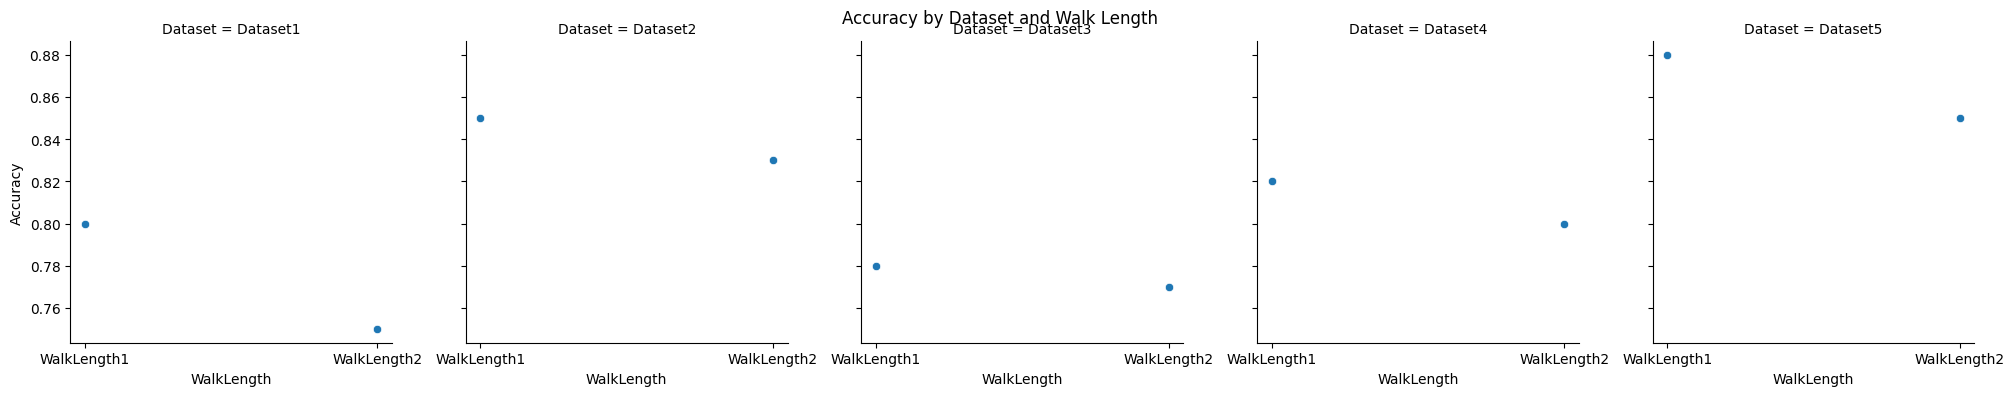

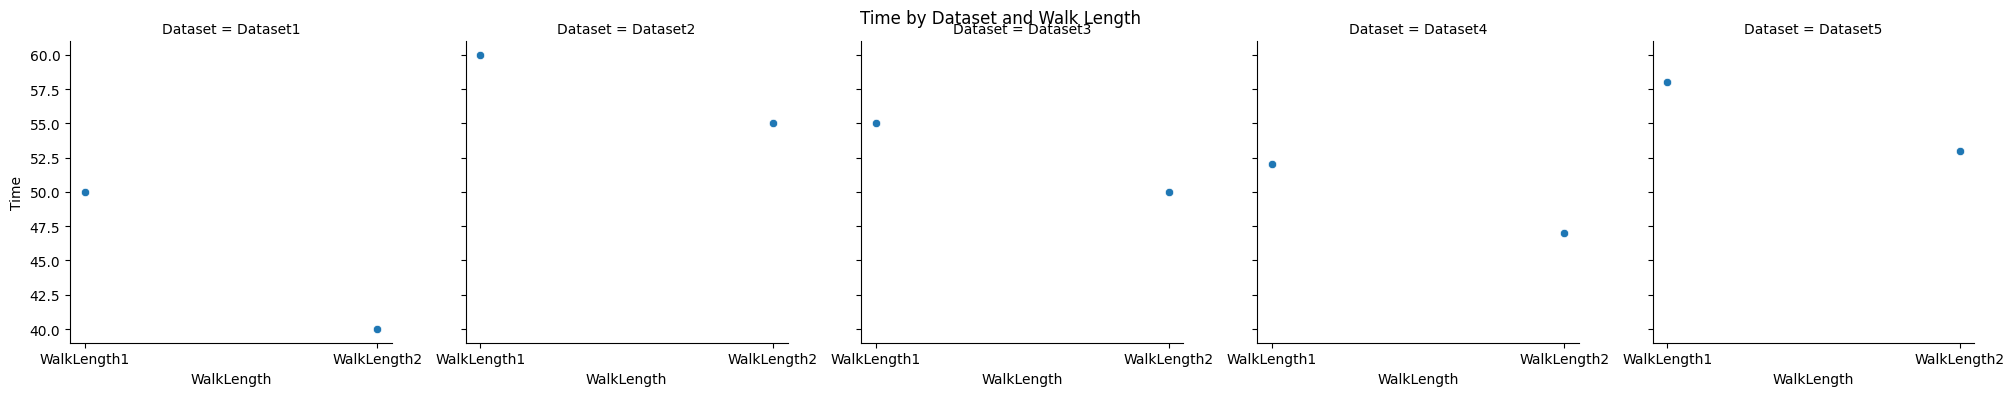

In [75]:
g = sns.FacetGrid(df, col="Dataset", height=4, aspect=1)
g.map(sns.scatterplot, "WalkLength", "Accuracy", marker='o')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Accuracy by Dataset and Walk Length')

h = sns.FacetGrid(df, col="Dataset", height=4, aspect=1)
h.map(sns.scatterplot, "WalkLength", "Time", marker='o')
h.add_legend()
h.fig.subplots_adjust(top=0.9)
h.fig.suptitle('Time by Dataset and Walk Length')
plt.show()


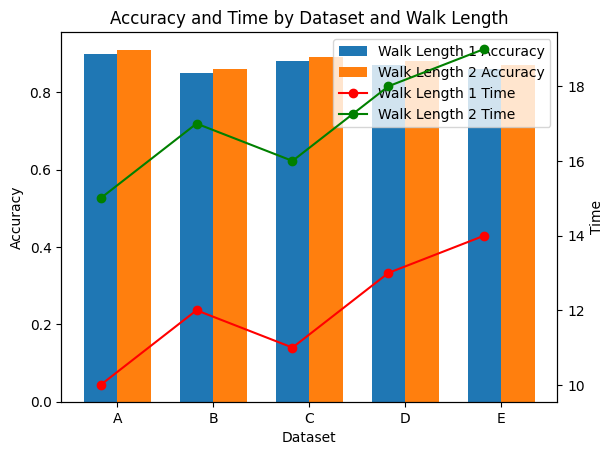

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
data = {
    'Dataset': ['A', 'B', 'C', 'D', 'E'],
    'Walk Length 1 Accuracy': [0.9, 0.85, 0.88, 0.87, 0.86],
    'Walk Length 2 Accuracy': [0.91, 0.86, 0.89, 0.88, 0.87],
    'Walk Length 1 Time': [10, 12, 11, 13, 14],
    'Walk Length 2 Time': [15, 17, 16, 18, 19]
}

df = pd.DataFrame(data)

fig, ax1 = plt.subplots()

# Bar plot for Accuracy
bar_width = 0.35
index = range(len(df))

bar1 = ax1.bar(index, df['Walk Length 1 Accuracy'], bar_width, label='Walk Length 1 Accuracy')
bar2 = ax1.bar([i + bar_width for i in index], df['Walk Length 2 Accuracy'], bar_width, label='Walk Length 2 Accuracy')

ax1.set_xlabel('Dataset')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy and Time by Dataset and Walk Length')
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(df['Dataset'])
ax1.legend(loc='upper left')

# Line plot for Time
ax2 = ax1.twinx()
line1, = ax2.plot(index, df['Walk Length 1 Time'], color='r', marker='o', label='Walk Length 1 Time')
line2, = ax2.plot(index, df['Walk Length 2 Time'], color='g', marker='o', label='Walk Length 2 Time')

ax2.set_ylabel('Time')

# Combine legends
bars_labels = [bar1, bar2]
lines_labels = [line1, line2]
ax1.legend(bars_labels + lines_labels, [bar.get_label() for bar in bars_labels] + [line.get_label() for line in lines_labels])

plt.show()


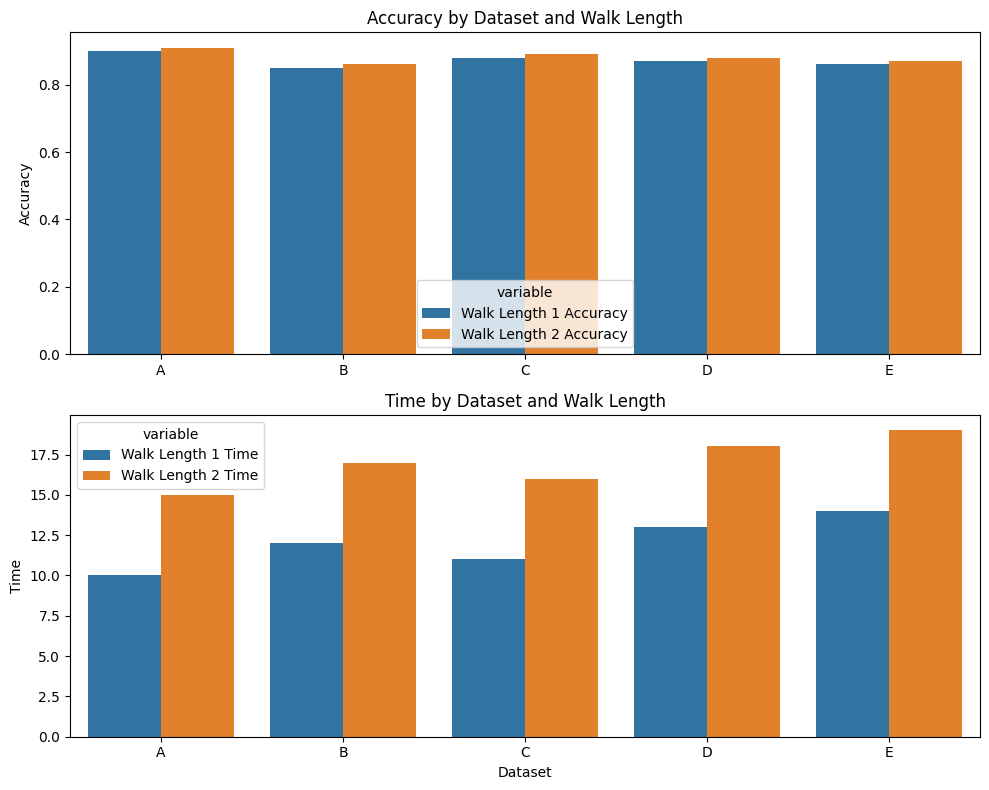

In [77]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Bar plot for Accuracy
sns.barplot(ax=axes[0], data=df.melt(id_vars=['Dataset'], value_vars=['Walk Length 1 Accuracy', 'Walk Length 2 Accuracy']),
            x='Dataset', y='value', hue='variable')
axes[0].set_title('Accuracy by Dataset and Walk Length')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('')

# Bar plot for Time
sns.barplot(ax=axes[1], data=df.melt(id_vars=['Dataset'], value_vars=['Walk Length 1 Time', 'Walk Length 2 Time']),
            x='Dataset', y='value', hue='variable')
axes[1].set_title('Time by Dataset and Walk Length')
axes[1].set_ylabel('Time')
axes[1].set_xlabel('Dataset')

plt.tight_layout()
plt.show()


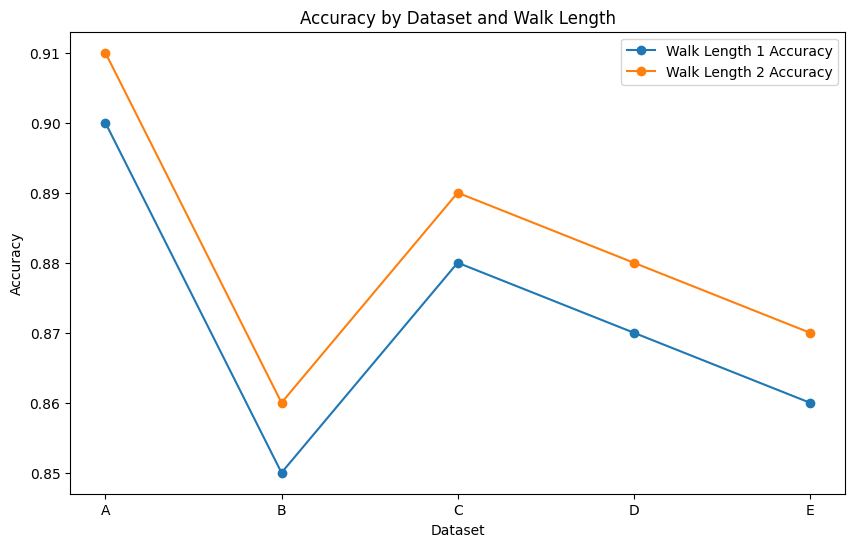

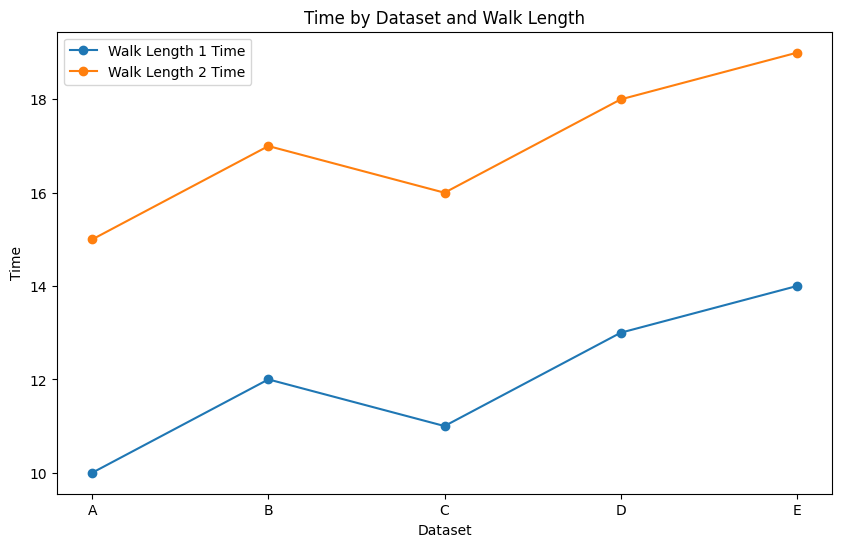

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))

# Multi-line plot for Accuracy
for wl in ['Walk Length 1 Accuracy', 'Walk Length 2 Accuracy']:
    ax.plot(df['Dataset'], df[wl], marker='o', label=wl)

ax.set_title('Accuracy by Dataset and Walk Length')
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.legend()

plt.show()

fig, ax = plt.subplots(figsize=(10, 6))

# Multi-line plot for Time
for wl in ['Walk Length 1 Time', 'Walk Length 2 Time']:
    ax.plot(df['Dataset'], df[wl], marker='o', label=wl)

ax.set_title('Time by Dataset and Walk Length')
ax.set_xlabel('Dataset')
ax.set_ylabel('Time')
ax.legend()

plt.show()
